In [1]:
import sys
import tensorflow as tf
import random
import numpy as np
tf.reset_default_graph()

def in_ipynb():
    try:
        cfg = get_ipython().config
        print(cfg)
        if 'jupyter' in cfg['IPKernelApp']['connection_file']:
            return True
        else:
            return False
    except NameError:
        return False

if in_ipynb():
    print("In IPython")
    exec("import Configs.SampleConfig as Conf")
    TrainConfig="Configs/SampleConfig"
else:
    TrainConfig=sys.argv[1]
    print("Importing settings from "+ TrainConfig.replace("/", "."))
    #exec("from "+TrainConfig+" import *")
    importConfig=TrainConfig.replace("/", ".")
    exec("import "+importConfig+" as Conf")

/home/akapoor/miniconda3/envs/forEGammaSFs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akapoor/miniconda3/envs/forEGammaSFs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akapoor/miniconda3/envs/forEGammaSFs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akapoor/minicond

{'IPKernelApp': {'connection_file': '/home/akapoor/.local/share/jupyter/runtime/kernel-63e74cf7-653f-4de4-84c9-d5133f3fb64d.json'}}
In IPython
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/home/akapoor/miniconda3/envs/forEGammaSFs/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akapoor/miniconda3/envs/forEGammaSFs/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akapoor/miniconda3/envs/forEGammaSFs/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
if not hasattr(Conf, 'MVAlogplot'): Conf.MVAlogplot=False
if not hasattr(Conf, 'Multicore'): Conf.Multicore=False
if not hasattr(Conf, 'RandomState'): Conf.RandomState=42

In [3]:

tf.compat.v1.random.set_random_seed(Conf.RandomState)
random.seed(Conf.RandomState)
np.random.seed(Conf.RandomState)

In [4]:
import os
os.system("")
try:
  import uproot3 as uproot
except ImportError:
  import uproot

In [5]:
import glob
import pandas as pd
import numpy as np
import ROOT
import matplotlib.pyplot as plt
import json

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

Welcome to JupyROOT 6.24/00


In [6]:
from Tools.PlotTools import *
import Tools.ptetaRwt as ptetaRwt

In [7]:

if Conf.Debug==True:
    prGreen("Running in debug mode : Only every 10th event will be used")
    
if len(Conf.MVAs)>0:
    for MVAd in Conf.MVAs:
        os.system("mkdir -p " + Conf.OutputDirName+"/"+MVAd)
prGreen("Making output directory")
os.system("mkdir -p " + Conf.OutputDirName)
os.system("mkdir -p " + Conf.OutputDirName+"/CodeANDConfig")
os.system("mkdir -p " + Conf.OutputDirName+"/Thresholds")
os.system("cp "+TrainConfig+".py ./"+ Conf.OutputDirName+"/CodeANDConfig/")
os.system("cp TrainerCombined.py ./"+ Conf.OutputDirName+"/CodeANDConfig/")    

 Running in debug mode : Only every 10th event will be used
 Making output directory


0

In [8]:
cat='Category'
weight='NewWt'


In [9]:
label=Conf.Classes

In [10]:
#Works in uproot3
prGreen("Making data frames")
Sigdf=pd.DataFrame()
Bkgdf=pd.DataFrame()

 Making data frames


In [11]:
import Tools.readData as readData
import sys
import os

In [12]:
import pandas as pd
if Conf.loadfromsaved:
    df_final=pd.read_parquet(Conf.OutputDirName+'/df.parquet.gzip')
else:
    df_final=readData.daskframe_from_rootfiles(Conf.processes,Conf.Tree,branches=Conf.branches,flatten=Conf.flatten,debug=Conf.Debug)
    if hasattr(Conf, 'SaveDataFrameCSV'): 
        if Conf.SaveDataFrameCSV:
            prGreen("Saving DataFrame : It can take sometime")
            df_final.to_parquet(Conf.OutputDirName+'/df.parquet.gzip',compression='gzip')

Getting data from DYJetsToLL_M-50_v7_ElePromptGenMatched.root
Getting data from DYJetsToLL_M-50_v7_ElePromptGenMatched.root
Getting data from DYJetsToLL_M-50_v7_ElePromptGenMatched.root
 Saving DataFrame : It can take sometime


In [13]:
fn = lambda row: Conf.Classes.index(row.Class)
df_final[cat] = df_final.apply(fn, axis=1)

In [14]:
#df_final.head()
Conf.modfiydf(df_final)
#Conf.modfiydf(Bkgdf)

0

In [15]:
#SigIndices=df_final.query("sample=='Signal'").index.values.tolist()
#BkgIndices=df_final.query("sample=='Background'").index.values.tolist()

index = df_final.index
Sigcondition = df_final["Class"] == "Signal"
Bkgcondition = df_final["Class"] == "Background"

SigIndices = index[Sigcondition].values.tolist()
BkgIndices = index[Bkgcondition].values.tolist()

from sklearn.model_selection import train_test_split
SigTrainIndices, SigTestIndices = train_test_split(SigIndices, test_size=Conf.testsize, random_state=Conf.RandomState, shuffle=True)
BkgTrainIndices, BkgTestIndices = train_test_split(BkgIndices, test_size=Conf.testsize, random_state=Conf.RandomState, shuffle=True)

In [16]:
TrainIndices=SigTrainIndices+BkgTrainIndices
TestIndices=SigTestIndices+BkgTestIndices

In [17]:
df_final.loc[TrainIndices,'Dataset'] = "Train"
df_final.loc[TestIndices,'Dataset'] = "Test"

df_final.loc[TrainIndices,'TrainDataset'] = 1
df_final.loc[TestIndices,'TrainDataset'] = 0

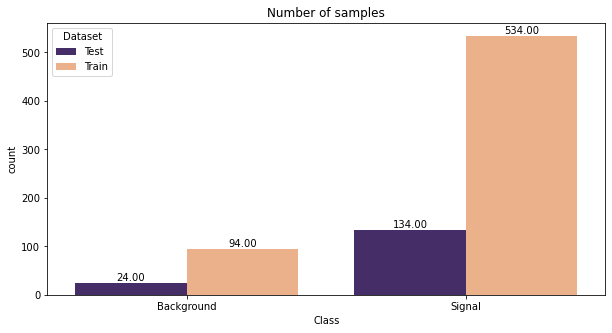

In [18]:
import seaborn as sns
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
kplot=sns.countplot(x="Class", data=df_final, ax=axes,hue='Dataset',palette=['#432371',"#FAAE7B"])
for p in kplot.patches:
    kplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
axes.set_title("Number of samples")
#axes.set_yscale("log")
plt.savefig(Conf.OutputDirName+"/TotalStat_TrainANDTest.pdf")
plt.savefig(Conf.OutputDirName+"/TotalStat_TrainANDTest.png")

In [19]:
def df_pteta_rwt(Mdf,
                 label,
                 returnOnlyPosWeights=0, 
                 ptw = [10,30,40,50,200,10000], 
                 etaw = [-1.5,-1.0,1.0,1.5], 
                 eta='', 
                 pt='',
                 SumWeightCol="wt",
                 NewWeightCol="NewWt",target=1,cand=0):
    #Mdf=Ndf.copy()
    Mdf["rwt"]=1
    Mdf[NewWeightCol]=1
    ptwt = [1.0]*len(ptw)
    etawt = [1.0]*len(etaw)
    
    for k in range(len(etaw)):
        if k == len(etaw)-1:
            continue
        for i in range(len(ptw)):
            if i == len(ptw)-1:
                continue

            targetSum = Mdf.loc[(Mdf[pt] <ptw[i+1]) & (Mdf[pt] >ptw[i]) & (Mdf[eta] <etaw[k+1]) & (Mdf[eta] >etaw[k]) &(Mdf[label]==target),SumWeightCol].sum()
            candSum = Mdf.loc[(Mdf[pt] <ptw[i+1]) & (Mdf[pt] >ptw[i]) & (Mdf[eta] <etaw[k+1]) & (Mdf[eta] >etaw[k]) &(Mdf[label]==cand),SumWeightCol].sum()

            #print('Number of xsec events in signal for pt '+str(ptw[i])+' to '+str(ptw[i+1])+ 'before  weighing = '+str(targetSum))
            #print('Number of xsec events in background for pt '+str(ptw[i])+' to '+str(ptw[i+1])+ 'before  weighing = '+str(candSum))

            if candSum>0 and targetSum>0:
                ptwt[i]=candSum/(targetSum)
            else:
                ptwt[i]=0
            Mdf.loc[(Mdf[pt] <ptw[i+1]) & (Mdf[pt] >ptw[i]) 
                    & (Mdf[eta] <etaw[k+1]) & (Mdf[eta] >etaw[k]) 
                    &(Mdf[label]==cand),"rwt"] = 1.0
            Mdf.loc[(Mdf[pt] <ptw[i+1]) & (Mdf[pt] >ptw[i]) 
                    & (Mdf[eta] <etaw[k+1]) & (Mdf[eta] >etaw[k]) 
                    &(Mdf[label]==target),"rwt"] = ptwt[i]

            Mdf.loc[:,NewWeightCol] = Mdf.loc[:,"rwt"]*Mdf.loc[:,SumWeightCol]
    
    MtargetSum = Mdf.loc[Mdf[label]==target,NewWeightCol].sum()
    McandSum = Mdf.loc[Mdf[label]==cand,NewWeightCol].sum()
    print('Number of events in signal after  weighing = '+str(MtargetSum))
    print('Number of events in background after  weighing = '+str(McandSum))

    return Mdf[NewWeightCol]
    

In [20]:
df_final[weight]=1

print("In Training:")
if Conf.Reweighing=='ptetaSig':
    df_final.loc[TrainIndices,weight]=df_pteta_rwt(df_final.loc[TrainIndices],cat,ptw=Conf.ptbins,etaw=Conf.etabins,pt=Conf.ptwtvar,eta=Conf.etawtvar,
                                                   SumWeightCol='xsecwt',NewWeightCol=weight, target=0,cand=1)
if Conf.Reweighing=='ptetaBkg':
    df_final.loc[TrainIndices,weight]=df_pteta_rwt(df_final.loc[TrainIndices],cat,ptw=Conf.ptbins,etaw=Conf.etabins,pt=Conf.ptwtvar,eta=Conf.etawtvar,
                                                   SumWeightCol='xsecwt',NewWeightCol=weight, target=1,cand=0)
print("In Testing:")
if Conf.Reweighing=='ptetaSig':
    df_final.loc[TestIndices,weight]=df_pteta_rwt(df_final.loc[TestIndices],cat,ptw=Conf.ptbins,etaw=Conf.etabins,pt=Conf.ptwtvar,eta=Conf.etawtvar,
                                                  SumWeightCol='xsecwt',NewWeightCol=weight, target=0,cand=1)
if Conf.Reweighing=='ptetaBkg':
    df_final.loc[TestIndices,weight]=df_pteta_rwt(df_final.loc[TestIndices],cat,ptw=Conf.ptbins,etaw=Conf.etabins,pt=Conf.ptwtvar,eta=Conf.etawtvar,
                                                  SumWeightCol='xsecwt',NewWeightCol=weight, target=1,cand=0)

In Training:
Number of events in signal after  weighing = 407.00000000000006
Number of events in background after  weighing = 534.0
In Testing:
Number of events in signal after  weighing = 84.0
Number of events in background after  weighing = 134.0


In [21]:
#df_final["ele_pt_bin"]=-9
#df_final["ele_eta_bin"]=-9
if Conf.Reweighing=='ptetaSig' or Conf.Reweighing=='ptetaBkg':
    df_final["ele_pt_bin"] = pd.cut(df_final[Conf.ptwtvar], 
                                    bins=Conf.ptbins, labels=list(range(len(Conf.ptbins)-1)))
    df_final["ele_eta_bin"] = pd.cut(df_final[Conf.etawtvar], 
                                     bins=Conf.etabins, labels=list(range(len(Conf.etabins)-1)))
    

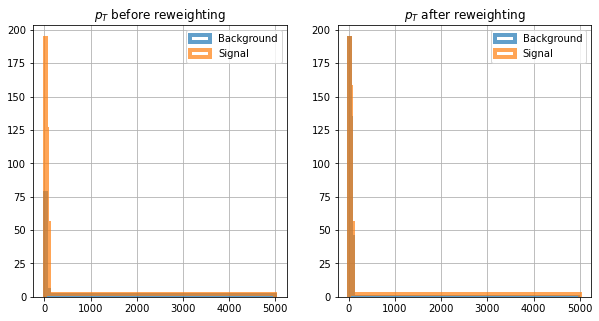

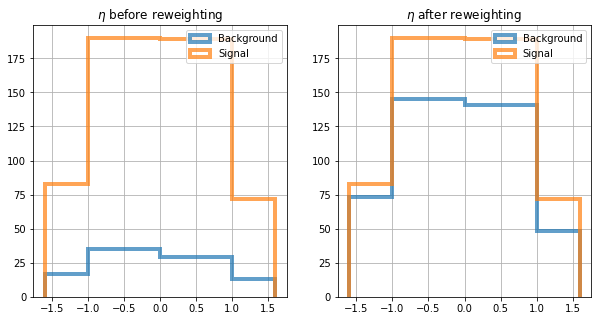

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i,group_df in df_final[df_final['Dataset'] == "Train"].groupby(cat):
    group_df[Conf.ptwtvar].hist(histtype='step', bins=Conf.ptbins, alpha=0.7,label=label[i], ax=ax[0], density=False, ls='-', weights =group_df["xsecwt"],linewidth=4)
    ax[0].set_title("$p_T$ before reweighting")
    ax[0].legend()
    group_df[Conf.ptwtvar].hist(histtype='step', bins=Conf.ptbins, alpha=0.7,label=label[i], ax=ax[1], density=False, ls='-', weights =group_df["NewWt"],linewidth=4)
    ax[1].set_title("$p_T$ after reweighting")
    ax[1].legend()
fig.savefig(Conf.OutputDirName+"/pT_rwt.pdf")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i,group_df in df_final[df_final['Dataset'] == "Train"].groupby(cat):
    group_df[Conf.etawtvar].hist(histtype='step', 
                                 bins=Conf.etabins,
                                 #[i for i in range(len(Conf.etabins)-1)], 
                                 alpha=0.7,label=label[i], ax=ax[0], density=False, ls='-', weights =group_df["xsecwt"],linewidth=4)
    ax[0].set_title("$\eta$ before reweighting")
    ax[0].legend()
    group_df[Conf.etawtvar].hist(histtype='step', 
                                 bins=Conf.etabins,
                                 alpha=0.7,label=label[i], ax=ax[1], density=False, ls='-', weights =group_df["NewWt"],linewidth=4)
    ax[1].set_title("$\eta$ after reweighting")
    ax[1].legend()
fig.savefig(Conf.OutputDirName+"/eta_rwt.pdf")
    

In [23]:
'''
fig, axee = plt.subplots(2, 2, figsize=(30, 10))
for i in [0,1]:
    axe=axee[0][i]
    sns.histplot(data=df_final.loc[TrainIndices].query("EleType==@i"), x="ele_eta_bin", y="ele_pt_bin",ax=axe,bins=40,
                 element="bars", fill=False,cbar=False,
                 weights="xsecwt")
    axe.set_title(label[i]+" before reweighting")
    
    axe=axee[1][i]
    sns.histplot(data=df_final.loc[TrainIndices].query("EleType==@i"), x="ele_eta_bin", y="ele_pt_bin",ax=axe,bins=40,
                 element="bars", fill=False,cbar=False,
                 weights="NewWt")
    axe.set_title(label[i]+" after reweighting")

fig.savefig(Conf.OutputDirName+"/eta_pt_rwt.pdf")
'''

'\nfig, axee = plt.subplots(2, 2, figsize=(30, 10))\nfor i in [0,1]:\n    axe=axee[0][i]\n    sns.histplot(data=df_final.loc[TrainIndices].query("EleType==@i"), x="ele_eta_bin", y="ele_pt_bin",ax=axe,bins=40,\n                 element="bars", fill=False,cbar=False,\n                 weights="xsecwt")\n    axe.set_title(label[i]+" before reweighting")\n    \n    axe=axee[1][i]\n    sns.histplot(data=df_final.loc[TrainIndices].query("EleType==@i"), x="ele_eta_bin", y="ele_pt_bin",ax=axe,bins=40,\n                 element="bars", fill=False,cbar=False,\n                 weights="NewWt")\n    axe.set_title(label[i]+" after reweighting")\n\nfig.savefig(Conf.OutputDirName+"/eta_pt_rwt.pdf")\n'

In [24]:
def PrepDataset(df_final,TrainIndices,TestIndices,features,cat,weight):
    X_train = df_final.loc[TrainIndices,features]
    Y_train = df_final.loc[TrainIndices,cat]
    Wt_train = df_final.loc[TrainIndices,weight]
    
    X_test = df_final.loc[TestIndices,features]
    Y_test = df_final.loc[TestIndices,cat]
    Wt_test = df_final.loc[TestIndices,weight]
    return np.asarray(X_train), np.asarray(Y_train), np.asarray(Wt_train), np.asarray(X_test), np.asarray(Y_test), np.asarray(Wt_test)

In [25]:
import pickle
import multiprocessing

 MakingTrain dataset feature plots
 MakingTest dataset feature plots
 Making Combined dataset feature plots
 XGB_1 Applying MinMaxScaler
 XGB_1 Training starting
 Performing XGB grid search
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s finished


 Expected neg log loss of XGB model = -44.6%
 XGB Best Parameters
 {'learning_rate': 0.1}
 Plotting output response for XGB
 Plotting ROC for XGB


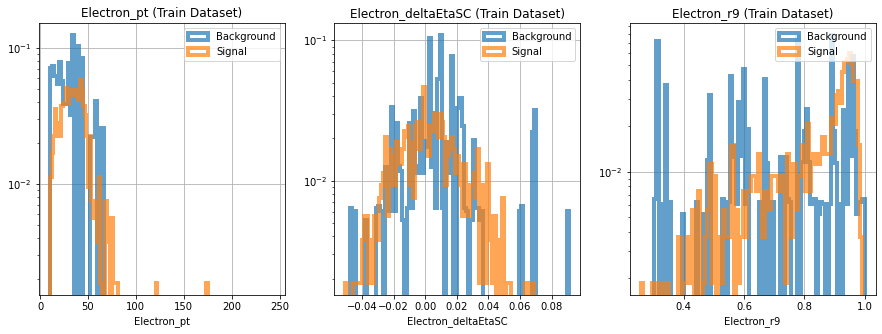

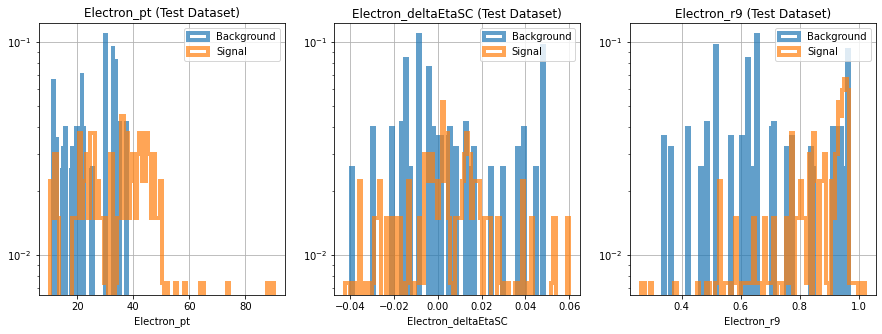

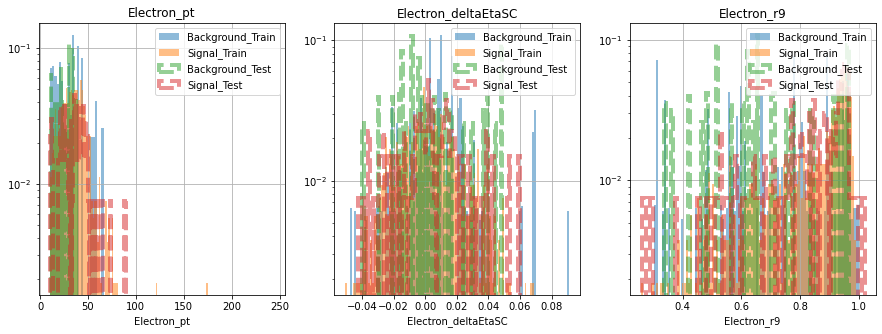

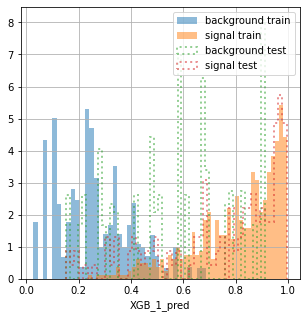

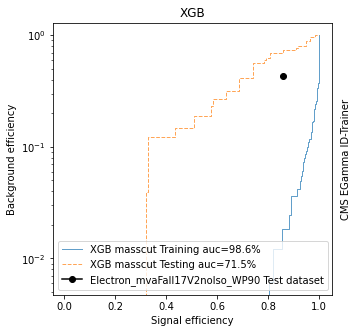

In [26]:
for MVA in Conf.MVAs:
    
    if 'XGB' in MVA:
        MakeFeaturePlots(df_final,Conf.features[MVA],Conf.feature_bins[MVA],Set="Train",MVA=MVA,OutputDirName=Conf.OutputDirName)
        MakeFeaturePlots(df_final,Conf.features[MVA],Conf.feature_bins[MVA],Set="Test",MVA=MVA,OutputDirName=Conf.OutputDirName)
        MakeFeaturePlotsComb(df_final,Conf.features[MVA],Conf.feature_bins[MVA],MVA=MVA,OutputDirName=Conf.OutputDirName)
        X_train, Y_train, Wt_train, X_test, Y_test, Wt_test = PrepDataset(df_final,TrainIndices,TestIndices,Conf.features[MVA],cat,weight)
        prGreen(MVA+" Applying "+Conf.Scaler[MVA])
        exec("from sklearn.preprocessing import "+Conf.Scaler[MVA])
        exec("sc = "+Conf.Scaler[MVA]+"()")
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        prGreen(MVA+" Training starting")
        import xgboost as xgb
        from sklearn.model_selection import cross_val_score, GridSearchCV
        xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=Conf.RandomState)
        #xgb_model.set_config(verbosity=2)
        prGreen("Performing XGB grid search")
        if Conf.Multicore:
            cv = GridSearchCV(xgb_model, Conf.XGBGridSearch[MVA],
                              scoring='neg_log_loss',cv=3,verbose=1,n_jobs=2)#multiprocessing.cpu_count())
        else:
            cv = GridSearchCV(xgb_model, Conf.XGBGridSearch[MVA],
                              scoring='neg_log_loss',cv=3,verbose=1)
        search=cv.fit(X_train, Y_train, sample_weight=Wt_train,verbose=1)
        pickle.dump(cv, open(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"modelXGB.pkl", "wb"))
        #modelDNN.save(Conf.OutputDirName+"/"+MVA+"_"+"modelDNN.h5")
        prGreen("Expected neg log loss of XGB model = "+str((np.round(np.average(search.best_score_),3))*100)+'%')
        #prGreen("Expected accuracy of XGB model = "+str((np.average(search.best_score_))*100)+'%')
        prGreen("XGB Best Parameters")
    
        #json.dumps(search.best_params_)
        prGreen(str(search.best_params_))
    
        df_final.loc[TrainIndices,MVA+"_pred"]=cv.predict_proba(X_train)[:,1]
        df_final.loc[TestIndices,MVA+"_pred"]=cv.predict_proba(X_test)[:,1]
    
        prGreen("Plotting output response for XGB")
        fig, axes = plt.subplots(1, 1, figsize=(5, 5))
        plot_mva(df_final.query('TrainDataset==1'),MVA+"_pred",bins=50,cat=cat,Wt=weight,ax=axes,sample='train',ls='dashed',logscale=Conf.MVAlogplot)
        plot_mva(df_final.query('TrainDataset==0'),MVA+"_pred",bins=50,cat=cat,Wt=weight,ax=axes,sample='test',ls='dotted',logscale=Conf.MVAlogplot)
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"XGBMVA.pdf")
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"XGBMVA.png")
    
        prGreen("Plotting ROC for XGB")
        fig, axes = plt.subplots(1, 1, figsize=(5, 5))
        plot_roc_curve(df_final.query('TrainDataset==1'),MVA+"_pred", tpr_threshold=0, ax=axes, color=None, linestyle='-', label=Conf.MVALabels[MVA]+' Training',cat=cat,Wt=weight)
        plot_roc_curve(df_final.query('TrainDataset==0'),MVA+"_pred", tpr_threshold=0, ax=axes, color=None, linestyle='--', label=Conf.MVALabels[MVA]+' Testing',cat=cat,Wt=weight)
        if len(Conf.OverlayWP)>0:
            for color,OverlayWpi in zip(Conf.OverlayWPColors,Conf.OverlayWP):
                plot_single_roc_point(df_final.query('TrainDataset==0'), var=OverlayWpi, ax=axes, color=color, marker='o', markersize=6, label=OverlayWpi+" Test dataset", cat=cat,Wt=weight)
        axes.set_ylabel("Background efficiency")
        axes.set_xlabel("Signal efficiency")
        axes.set_title("XGB")
        axes.text(1.05, 0.5, 'CMS EGamma ID-Trainer',
            horizontalalignment='center',
            verticalalignment='center',
            rotation='vertical',
            transform=axes.transAxes)
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"XGBROC.pdf")
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"XGBROC.png")

 MakingTrain dataset feature plots
 MakingTest dataset feature plots
 Making Combined dataset feature plots
 DNN_1 Applying MinMaxScaler
 DNN fitting running
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 628 samples, validate on 158 samples
Epoch 1/10
628/628 [==============================] - 0s 266us/sample - loss: 1.1573 - acc: 0.2197 - val_loss: 1.0776 - val_acc: 0.1519
Epoch 2/10
628/628 [==============================] - 0s 23us/sample - loss: 1.1460 - acc: 0.2182 - val_loss: 1.0642 - val_acc: 0.1646
Epoch 3/10
628/628 [==============================] - 0s 28us/sample - loss: 1.1374 - acc: 0.2245 - val_loss: 1.0518 - val_acc: 0.1962
Epoch 4/10
628/628 [==============================] - 0s 28us/sample - loss: 1.1239 - acc: 0.2341 - val_loss: 1.0406 - val_acc: 0.2025
Epoch 5/10
628/628 [==============================] - 0s 30us/sample - loss: 1.1110 - acc: 0.2723 - val_loss: 1.0308 - val_acc: 0.2278
Epoch 6/10
628/628 [======

2021-07-06 01:48:55.496753: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-07-06 01:48:55.500828: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3193875000 Hz
2021-07-06 01:48:55.502004: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a15a061840 executing computations on platform Host. Devices:
2021-07-06 01:48:55.502015: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-07-06 01:48:55.530123: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not 

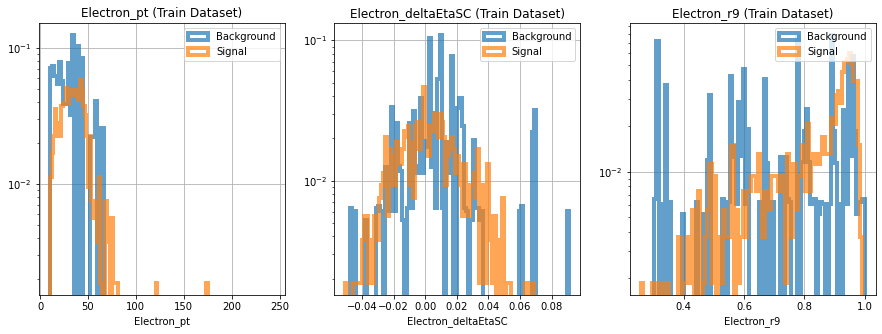

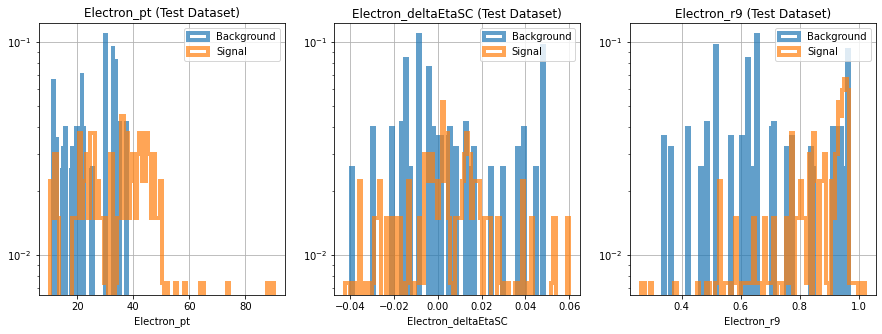

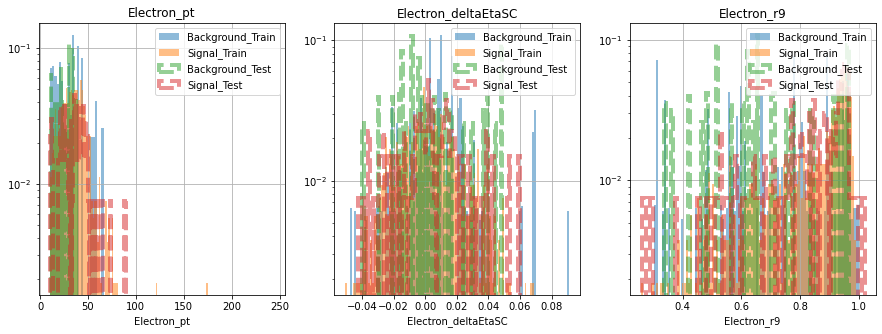

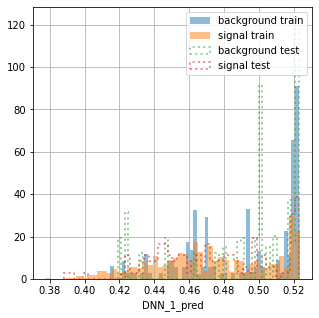

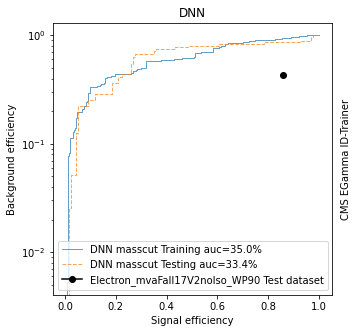

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
for MVA in Conf.MVAs:
    if 'DNN' in MVA:
        MakeFeaturePlots(df_final,Conf.features[MVA],Conf.feature_bins[MVA],Set="Train",MVA=MVA,OutputDirName=Conf.OutputDirName)
        MakeFeaturePlots(df_final,Conf.features[MVA],Conf.feature_bins[MVA],Set="Test",MVA=MVA,OutputDirName=Conf.OutputDirName)
        MakeFeaturePlotsComb(df_final,Conf.features[MVA],Conf.feature_bins[MVA],MVA=MVA,OutputDirName=Conf.OutputDirName)
        X_train, Y_train, Wt_train, X_test, Y_test, Wt_test = PrepDataset(df_final,TrainIndices,TestIndices,Conf.features[MVA],cat,weight)
        prGreen(MVA+" Applying "+Conf.Scaler[MVA])
        exec("from sklearn.preprocessing import "+Conf.Scaler[MVA])
        exec("sc = "+Conf.Scaler[MVA]+"()")
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        prGreen("DNN fitting running")
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        modelDNN=Conf.DNNDict[MVA]['model']
        modelDNN.compile(loss='binary_crossentropy', optimizer=Adam(lr=Conf.DNNDict[MVA]['lr']), metrics=['accuracy',])
        train_history = modelDNN.fit(X_train,Y_train,epochs=Conf.DNNDict[MVA]['epochs'],batch_size=Conf.DNNDict[MVA]['batchsize'],validation_data=(X_test,Y_test, Wt_test),
                                     verbose=1,callbacks=[es], sample_weight=Wt_train)
        modelDNN.save(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"modelDNN.h5")
        df_final.loc[TrainIndices,MVA+"_pred"]=modelDNN.predict(X_train)
        df_final.loc[TestIndices,MVA+"_pred"]=modelDNN.predict(X_test)
    
        prGreen("Plotting output response for DNN")
        fig, axes = plt.subplots(1, 1, figsize=(5, 5))
        plot_mva(df_final.query('TrainDataset==1'),MVA+"_pred",bins=50,cat=cat,Wt=weight,ax=axes,sample='train',ls='dashed',logscale=Conf.MVAlogplot)
        plot_mva(df_final.query('TrainDataset==0'),MVA+"_pred",bins=50,cat=cat,Wt=weight,ax=axes,sample='test',ls='dotted',logscale=Conf.MVAlogplot)
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"DNNMVA.pdf")
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"DNNMVA.png")
    
        prGreen("Plotting ROC for DNN")
        fig, axes = plt.subplots(1, 1, figsize=(5, 5))
        plot_roc_curve(df_final.query('TrainDataset==1'),MVA+"_pred", tpr_threshold=0, ax=axes, color=None, linestyle='-', label=Conf.MVALabels[MVA]+' Training',cat=cat,Wt=weight)
        plot_roc_curve(df_final.query('TrainDataset==0'),MVA+"_pred", tpr_threshold=0, ax=axes, color=None, linestyle='--', label=Conf.MVALabels[MVA]+' Testing',cat=cat,Wt=weight)
        if len(Conf.OverlayWP)>0:
            for color,OverlayWpi in zip(Conf.OverlayWPColors,Conf.OverlayWP):
                plot_single_roc_point(df_final.query('TrainDataset==0'), var=OverlayWpi, ax=axes, color=color, marker='o', markersize=6, label=OverlayWpi+" Test dataset", cat=cat,Wt=weight)
        axes.set_ylabel("Background efficiency")
        axes.set_xlabel("Signal efficiency")
        axes.set_title("DNN")
        axes.text(1.05, 0.5, 'CMS EGamma ID-Trainer',
            horizontalalignment='center',
            verticalalignment='center',
            rotation='vertical',
            transform=axes.transAxes)
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"DNNROC.pdf")
        plt.savefig(Conf.OutputDirName+"/"+MVA+"/"+MVA+"_"+"DNNROC.png")

In [28]:
if 'Genetic' in Conf.MVAs:
    prGreen("Sorry Genetic algo not implemented yet! Coming Soon")

 Plotting Final ROC


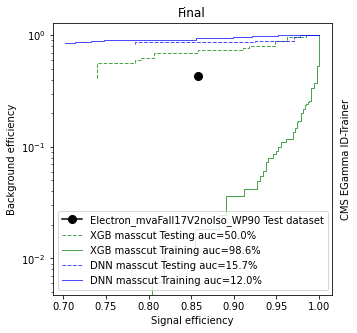

In [29]:
##PlotFinalROC
prGreen("Plotting Final ROC")
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
if len(Conf.OverlayWP)>0:
    for color,OverlayWpi in zip(Conf.OverlayWPColors,Conf.OverlayWP):
        plot_single_roc_point(df_final.query('TrainDataset==0'), var=OverlayWpi, ax=axes, color=color, marker='o', markersize=8, label=OverlayWpi+" Test dataset", cat=cat,Wt=weight)
if len(Conf.MVAs)>0:
    for color,MVAi in zip(Conf.MVAColors,Conf.MVAs):
        plot_roc_curve(df_final.query('TrainDataset==0'),MVAi+"_pred", tpr_threshold=0.7, ax=axes, color=color, linestyle='--', label=Conf.MVALabels[MVAi]+' Testing',cat=cat,Wt=weight)
        plot_roc_curve(df_final.query('TrainDataset==1'),MVAi+"_pred", tpr_threshold=0.7, ax=axes, color=color, linestyle='-', label=Conf.MVALabels[MVAi]+' Training',cat=cat,Wt=weight)
    axes.set_ylabel("Background efficiency")
    axes.set_xlabel("Signal efficiency")
    axes.set_title("Final")
    axes.text(1.05, 0.5, 'CMS EGamma ID-Trainer',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=axes.transAxes)
plt.savefig(Conf.OutputDirName+"/ROCFinal.pdf")
plt.savefig(Conf.OutputDirName+"/ROCFinal.png")

In [30]:
PredMVAs=[]
for MVA in Conf.MVAs:
    PredMVAs.append(MVA+'_pred')
SigEffWPs=Conf.SigEffWPs[:]
for i,SigEffWPi in enumerate(SigEffWPs):
    SigEffWPs[i]=int(SigEffWPi.replace('%', ''))/100

if len(Conf.MVAs)>0:
    prGreen("Threshold values for requested Signal Efficiencies (Train Dataset)")
    mydf=df_final.query("TrainDataset==1 & "+cat+"==1")[PredMVAs].quantile(SigEffWPs)
    mydf.insert(0, "WPs", Conf.SigEffWPs, True)
    mydf.set_index("WPs",inplace=True)
    prGreen(mydf)
    mydf.to_html(Conf.OutputDirName+'/Thresholds/'+"SigEffWPs_Train.html")
    mydf.to_csv(Conf.OutputDirName+'/Thresholds/'+"SigEffWPs_Train.csv")
    prGreen("Threshold values for requested Signal Efficiencies (Test Dataset)")
    mydf2=df_final.query("TrainDataset==0 & "+cat+"==1")[PredMVAs].quantile(SigEffWPs)
    mydf2.insert(0, "WPs", Conf.SigEffWPs, True)
    mydf2.set_index("WPs",inplace=True)
    prGreen(mydf2)
    mydf2.to_html(Conf.OutputDirName+'/Thresholds/'+"SigEffWPs_Test.html")
    mydf2.to_csv(Conf.OutputDirName+'/Thresholds/'+"SigEffWPs_Test.csv")

 Threshold values for requested Signal Efficiencies (Train Dataset)
      XGB_1_pred  DNN_1_pred
WPs                        
80%    0.954389    0.511741
90%    0.975893    0.519649
 Threshold values for requested Signal Efficiencies (Test Dataset)
      XGB_1_pred  DNN_1_pred
WPs                        
80%    0.958105    0.510705
90%    0.977194    0.520415


In [31]:
pngtopdf(ListPattern=[Conf.OutputDirName+'/*/*ROC*png',Conf.OutputDirName+'/*ROC*png'],Save=Conf.OutputDirName+"/mydocROC.pdf")
pngtopdf(ListPattern=[Conf.OutputDirName+'/*/*MVA*png'],Save=Conf.OutputDirName+"/mydocMVA.pdf")

prGreen("Done!! Please find the quick look ROC pdf here "+Conf.OutputDirName+"/mydocROC.pdf")
prGreen("Done!! Please find the quick look MVA pdf here "+Conf.OutputDirName+"/mydocMVA.pdf")
prGreen("Individual plots and saved model files can be found in directory: "+Conf.OutputDirName+'/')

 Done!! Please find the quick look ROC pdf here Output/mydocROC.pdf
 Done!! Please find the quick look MVA pdf here Output/mydocMVA.pdf
 Individual plots and saved model files can be found in directory: Output/
